### Problem Statement:

This case requires developing a customer segmentation to define a marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset:

- CUSTID: Identification of Credit Cardholder (Categorical)
- BALANCE: Balance amount left in their account to make purchases
- BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from the account
- ONEOFFPURCHASES: Maximum purchase amount did in one-go
- INSTALLMENTSPURCHASES: Amount of purchase done in installment
- CASH ADVANCE: Cash in advance given by the user
- PURCHASESFREQUENCY: How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY: How frequently is the cash in advance being paid
- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX: Number of purchase transactions made
- CREDIT LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by the user
- MINIMUM_PAYMENTS: Minimum amount of payments made by the user
- PRCFULLPAYMENT: Percent of full payment paid by the user
- TENURE: Tenure of credit card service for user (months)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [4]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [5]:
df.MINIMUM_PAYMENTS.mean()

np.float64(864.2065423050828)

In [6]:
df.MINIMUM_PAYMENTS.median()

np.float64(312.343947)

In [7]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns

In [8]:
sns.set_style("darkgrid")

/var/folders/dq/qk8zdkks74s233j5sqv_tsb40000gn/T/ipykernel_13139/3779404366.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TENURE', data=df, palette='viridis')


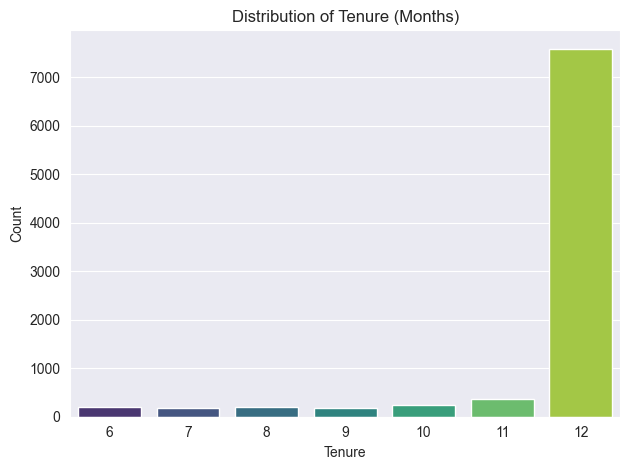

In [10]:
sns.countplot(x='TENURE', data=df, palette='viridis')
plt.title('Distribution of Tenure (Months)')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- The vast majority of customers have a tenure of 12 months -> The customer base is mature, indicating good customer retention.
- Very few customers are in the 6 to 11 month range -> few recent credit card users.
- This shows a heavy skew toward customers who have been with the card for a full year.

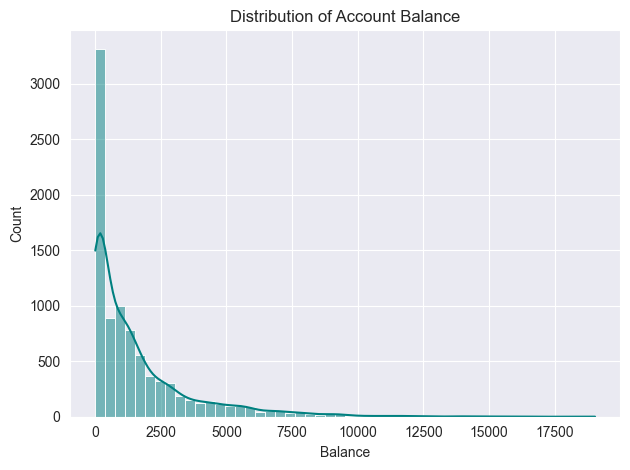

In [11]:
sns.histplot(df['BALANCE'], kde=True, bins=50, color='teal')
plt.title('Distribution of Account Balance')
plt.xlabel('Balance')
plt.tight_layout()
plt.show()

- The distribution is heavily right-skewed (long tail to the right).
- A large number of customers have very low balances, clustered around 0–1000.
- Only a small minority have very high balances (e.g., >10,000).

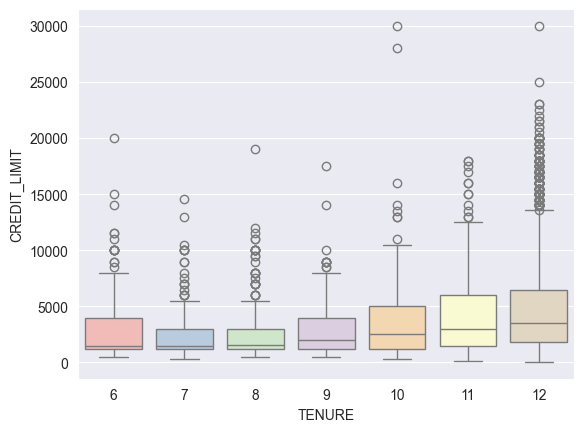

In [12]:
sns.boxplot(x='TENURE', y='CREDIT_LIMIT', data = df, hue='TENURE', palette='Pastel1', legend=False);

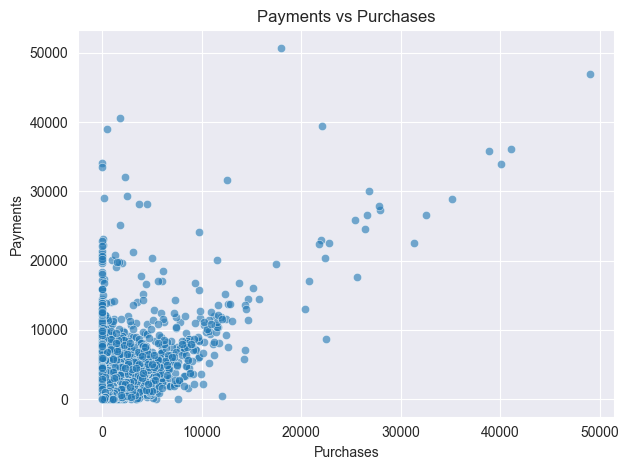

In [13]:
sns.scatterplot(x='PURCHASES', y='PAYMENTS', data=df, alpha=0.6)
plt.title('Payments vs Purchases')
plt.xlabel('Purchases')
plt.ylabel('Payments')
plt.tight_layout()
plt.show()

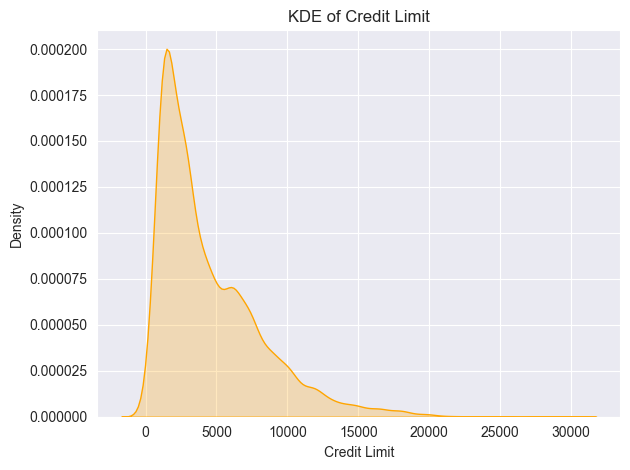

In [14]:
df['CREDIT_LIMIT'] = pd.to_numeric(df['CREDIT_LIMIT'], errors='coerce')
sns.kdeplot(df['CREDIT_LIMIT'].dropna(), fill=True, color='orange')
plt.title('KDE of Credit Limit')
plt.xlabel('Credit Limit')
plt.tight_layout()
plt.show()

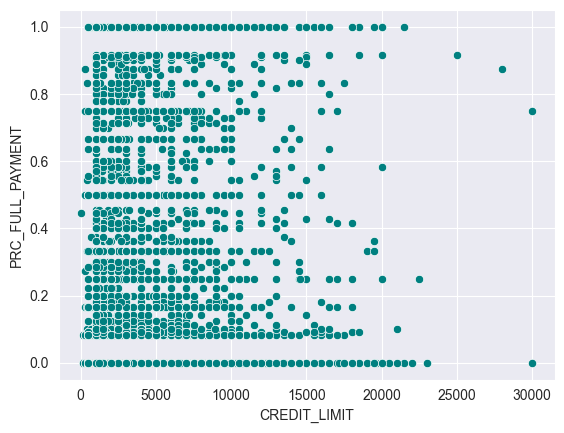

In [15]:
sns.scatterplot(x='CREDIT_LIMIT', y='PRC_FULL_PAYMENT', data=df, color='teal');

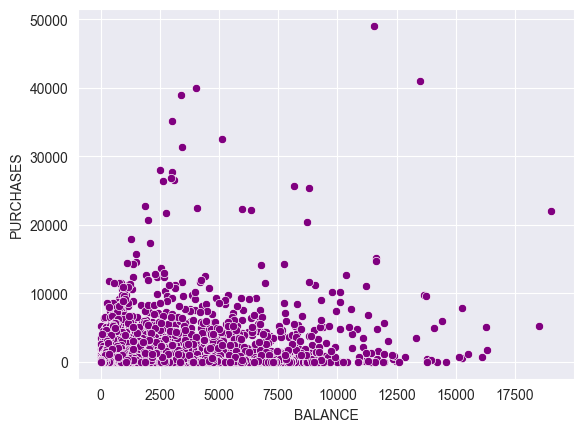

In [16]:
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df, color='purple');

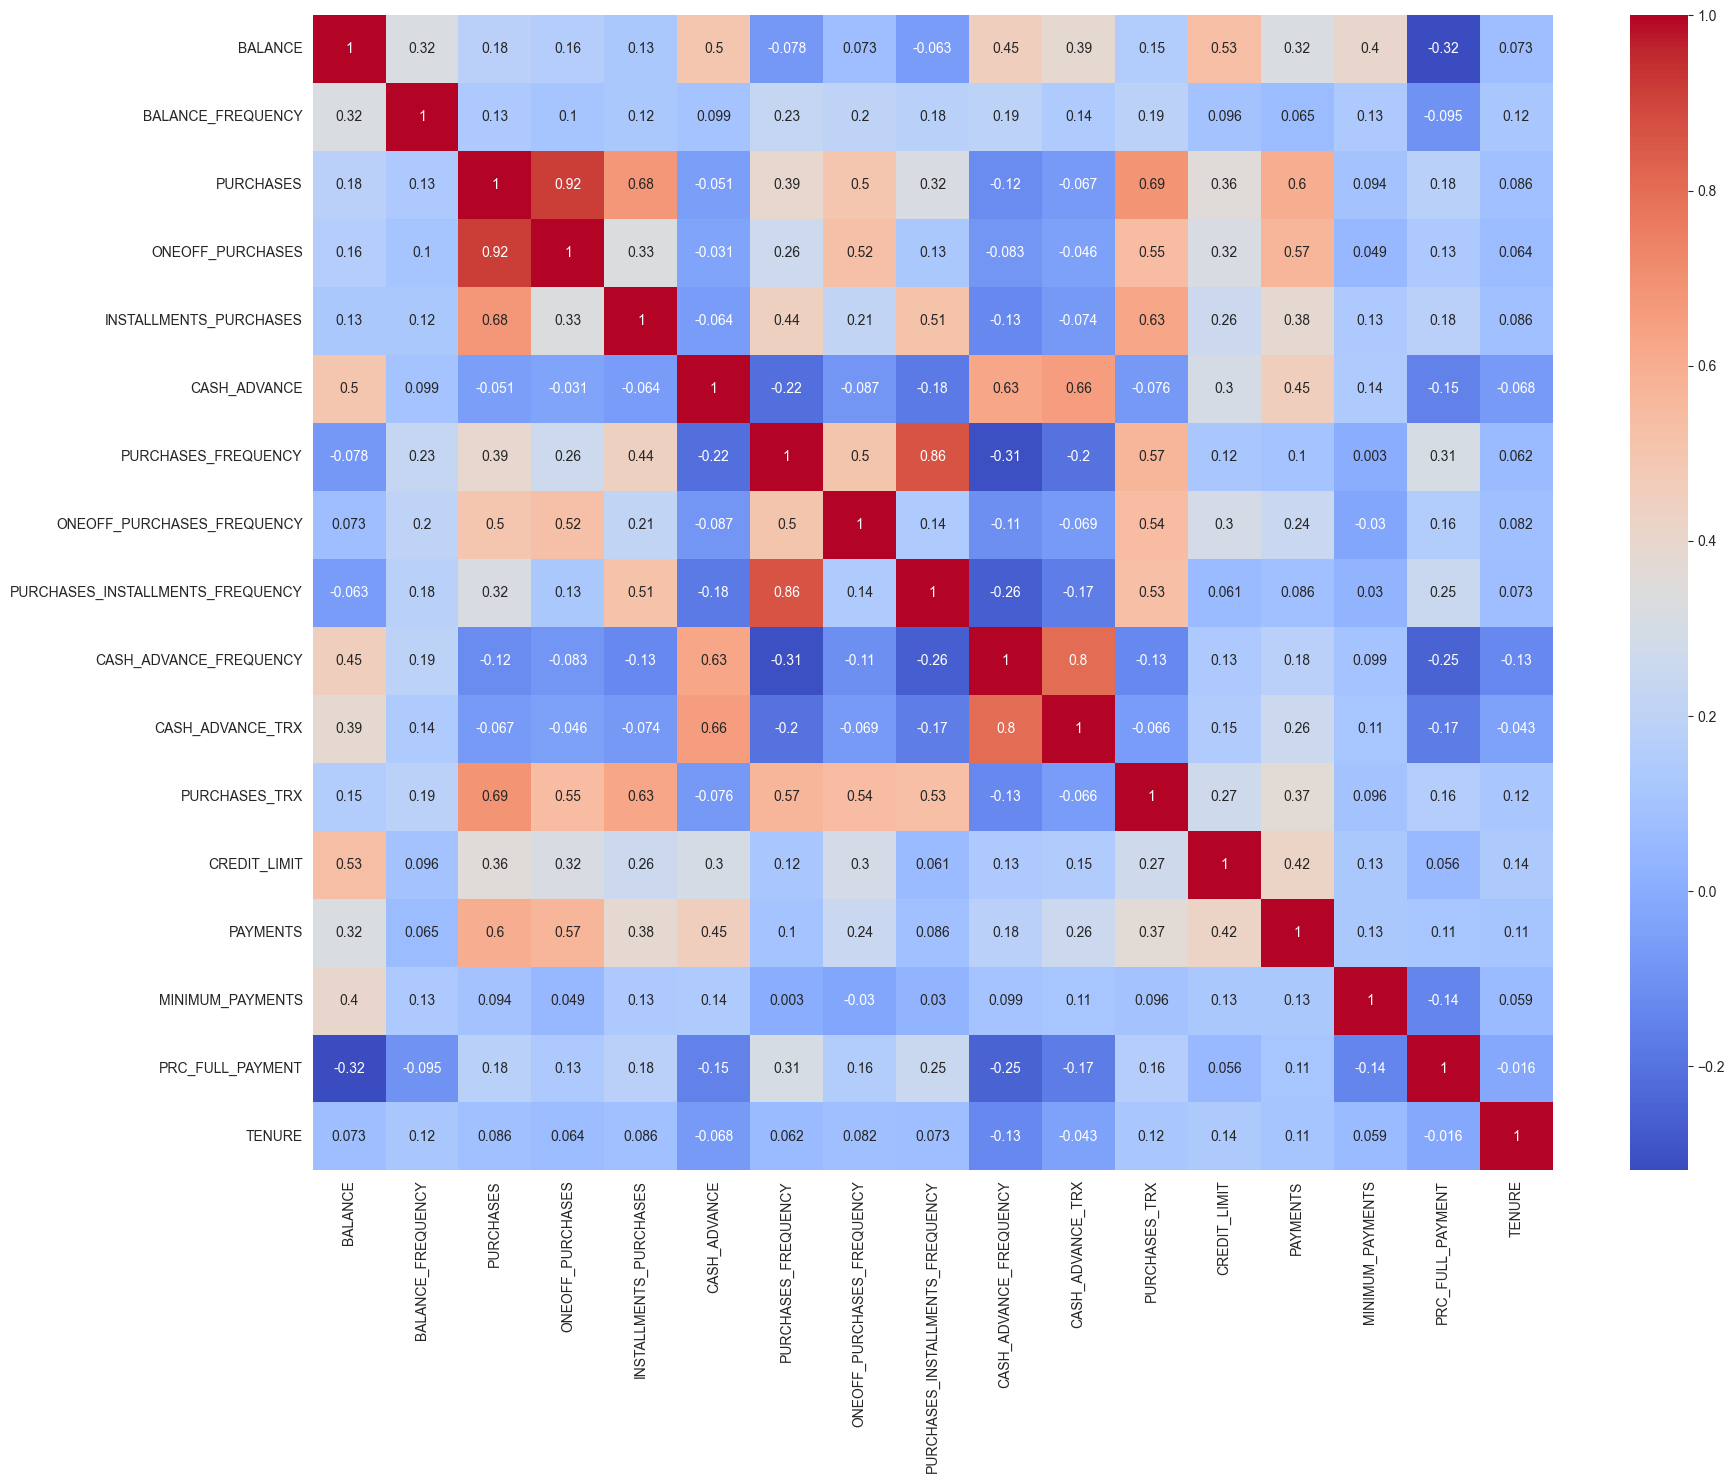

In [17]:
plt.subplots(figsize=(20,15))
sns.heatmap(df[num_col].corr(), cmap='coolwarm', annot = True);

| Feature 1                  | Feature 2                        | Corr Coeff | Correlation Insights                                               |
|---------------------------|----------------------------------|------------|--------------------------------------------------------------------------------|
| PURCHASES                 | ONEOFF_PURCHASES                 | 0.92       | Most purchases are one-off; strong overlap in spending behavior                |
| PURCHASES                 | INSTALLMENTS_PURCHASES           | 0.68*      | Many purchases are made via installments; part of total purchase behavior      |
| ONEOFF_PURCHASES          | PURCHASES                        | 0.92       | One-off transactions form a major part of total purchases                      |
| PURCHASES_FREQUENCY       | PURCHASES_INSTALLMENTS_FREQUENCY | 0.86       | Customers who purchase frequently often use installment plans                  |
| CASH_ADVANCE              | CASH_ADVANCE_TRX                 | 0.90       | More transactions lead to higher cash advance amounts                         |
| PURCHASES                 | PURCHASES_TRX                    | 0.75       | Higher total purchases correlate with more purchase transactions               |

### Filling in missing data with KNN Imputer

In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df[num_col]),columns = df[num_col].columns)
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [19]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,379.829982,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


### Clustering

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import Birch, AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

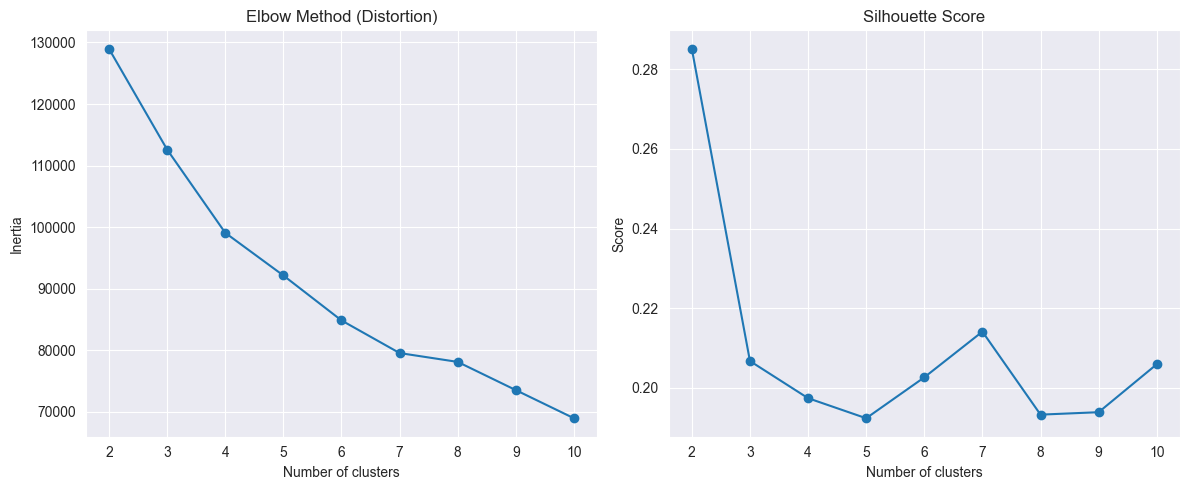

In [22]:
def plot_elbow_silhouette(X, max_clusters=10):
    distortions = []
    silhouette_scores = []
    K = range(2, max_clusters + 1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)  
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(K, distortions, marker='o')
    ax[0].set_title('Elbow Method (Distortion)')
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('Inertia')

    ax[1].plot(K, silhouette_scores, marker='o')
    ax[1].set_title('Silhouette Score')
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('Score')

    plt.tight_layout()
    plt.show()
    
plot_elbow_silhouette(df_scaled, max_clusters=10)

1. Elbow Method (Inertia)
	- The elbow appears clearly at k = 4, where the drop in inertia starts to level off.
	- After 4, the gains in lowering inertia are diminishing — a classic sign of the elbow point.

2. Silhouette Score
	- k = 2 has the highest silhouette score, which means the clusters are the most well-defined at that point.
	- However, the drop from k=2 to k=3 is steep, and from k=4 onward, the score stabilizes at a lower level.

In [23]:
def get_silhouette(model, X):
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    return score, labels

In [24]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(df_scaled)

pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(df_scaled)

In [25]:
def plot_2d_clusters(X, labels, title):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='crest')
    plt.title(title)
    plt.show()

In [40]:
birch = Birch(n_clusters=4)
sil_birch, labels_birch = get_silhouette(birch, df_scaled)

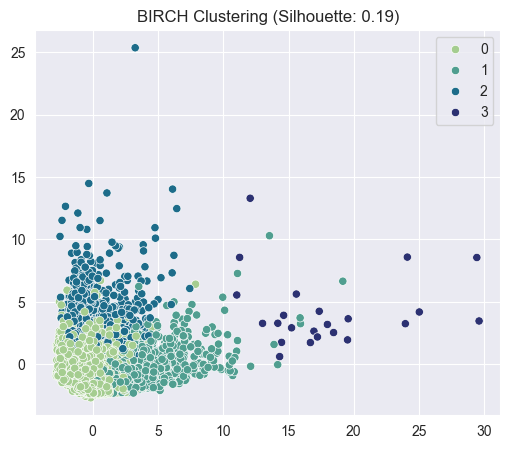

In [41]:
plot_2d_clusters(X_2d, labels_birch, f'BIRCH Clustering (Silhouette: {sil_birch:.2f})')

In [39]:
agglo = AgglomerativeClustering(n_clusters=4)
labels_agglo = agglo.fit_predict(df_scaled)
sil_agglo = silhouette_score(df_scaled, labels_agglo)

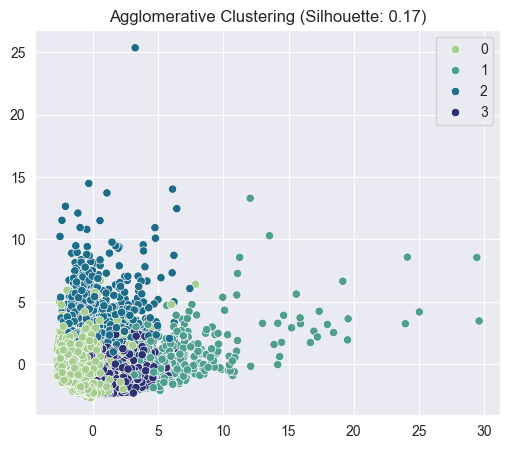

In [42]:
plot_2d_clusters(X_2d, labels_agglo, f'Agglomerative Clustering (Silhouette: {sil_agglo:.2f})')

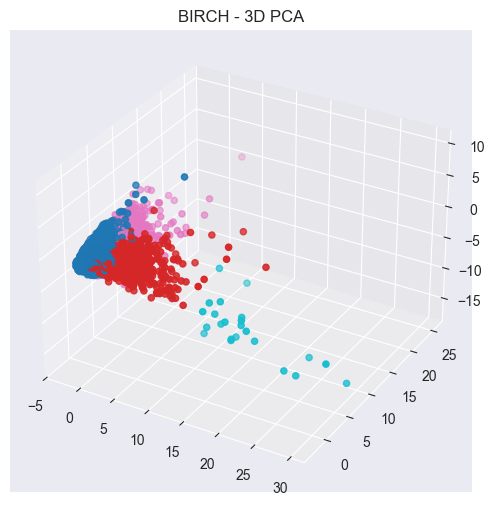

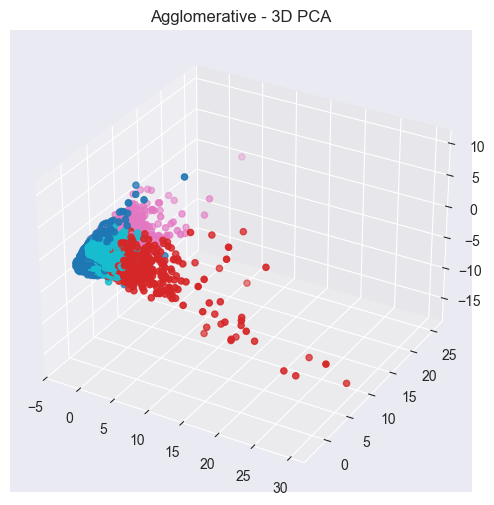

In [43]:
def plot_3d_clusters(X, labels, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='tab10')
    ax.set_title(title)
    plt.show()

plot_3d_clusters(X_3d, labels_birch, 'BIRCH - 3D PCA')
plot_3d_clusters(X_3d, labels_agglo, 'Agglomerative - 3D PCA')

In [38]:
from sklearn.metrics import davies_bouldin_score

db_birch = davies_bouldin_score(df_scaled, labels_birch)
db_agglo = davies_bouldin_score(df_scaled, labels_agglo)

print(f"BIRCH Davies-Bouldin Index: {db_birch:.2f}")
print(f"Agglomerative Davies-Bouldin Index: {db_agglo:.2f}")

BIRCH Davies-Bouldin Index: 1.76
Agglomerative Davies-Bouldin Index: 1.75


Davies Bouldin Score Comparison

| Clustering Method | No. of Clusters | Davies-Bouldin Score |
|-------------------|------------------|--------------------------|
| BIRCH             | 3                | 1.76                  |
| Agglomerative     | 3                | 1.75                  |
| BIRCH             | 4                | 1.49                  |
| Agglomerative     | 4                | 1.67                  |

BIRCH performs better in 4 clusters with a lower score indicating lesser intra-cluster similarity and more inter-cluster differences.


In [31]:
from sklearn.metrics import calinski_harabasz_score

ch_birch = calinski_harabasz_score(df_scaled, labels_birch)
ch_agglo = calinski_harabasz_score(df_scaled, labels_agglo)

print(f"BIRCH Calinski-Harabasz Score: {ch_birch:.2f}")
print(f"Agglomerative Calinski-Harabasz Score: {ch_agglo:.2f}")

BIRCH Calinski-Harabasz Score: 1150.18
Agglomerative Calinski-Harabasz Score: 1329.91


Calinski-Harabasz Score Comparison

| Clustering Method | No. of Clusters | Calinski-Harabasz Score |
|-------------------|------------------|--------------------------|
| BIRCH             | 3                | 1251.84                  |
| Agglomerative     | 3                | 1345.29                  |
| BIRCH             | 4                | 1150.18                  |
| Agglomerative     | 4                | 1329.91                  |

Agglomerative Clustering continues to outperform BIRCH in both cases, indicating higher cluster compactness and separation. We will proceed with 4 clusters using Agglomerative.

In [110]:
df['cluster'] = labels_agglo
df.to_csv('credit_card_clusters.csv', index=False)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,379.829982,0.000000,12.0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0


/var/folders/dq/qk8zdkks74s233j5sqv_tsb40000gn/T/ipykernel_1882/4190802547.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='mako')


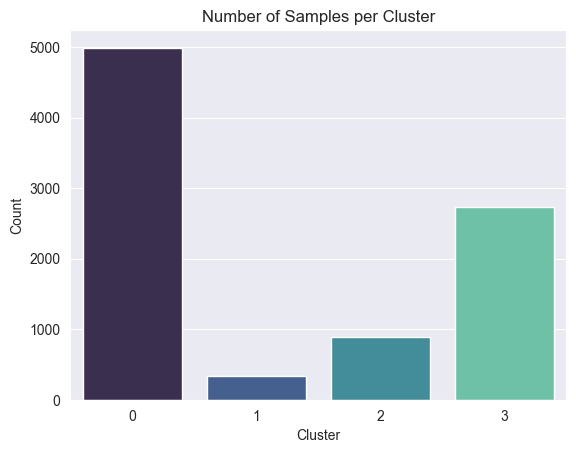

In [123]:
sns.countplot(x='cluster', data=df, palette='mako')
plt.title('Number of Samples per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

| Cluster | No. of Users |
|---------|--------------|
| 0       | 4992         |
| 1       | 339          |
| 2       | 889          |
| 3       | 2730         |

- Cluster 0 is the largest group, containing nearly half of the total customers.
- Cluster 1 is significantly smaller, indicating a potentially niche or unusual customer segment.
- Cluster 2 and Cluster 3 are moderate in size, possibly representing more typical user groups.

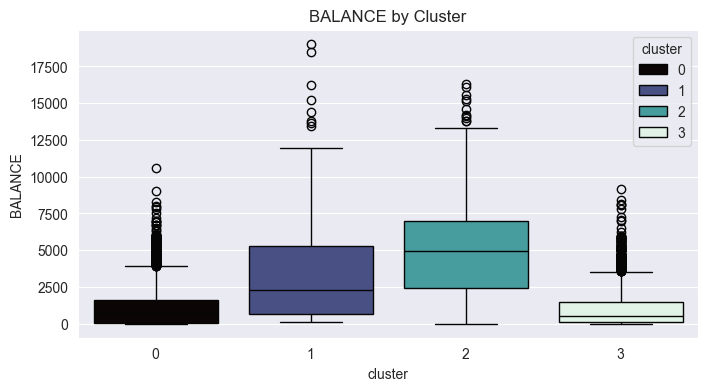

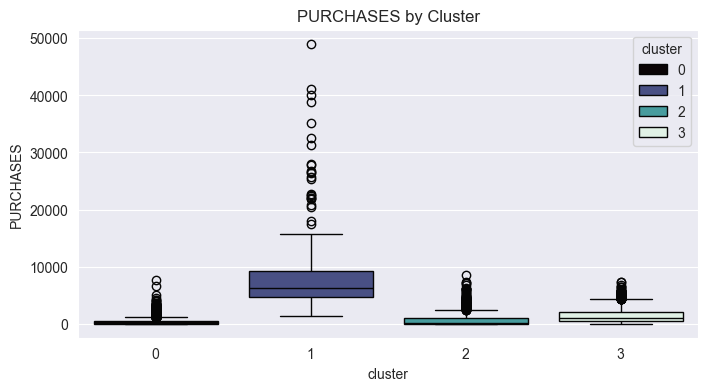

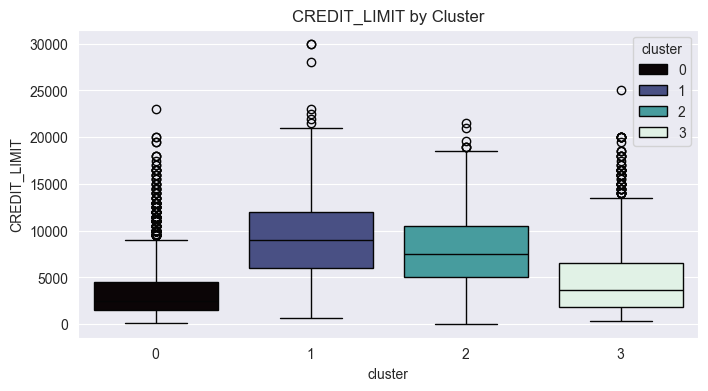

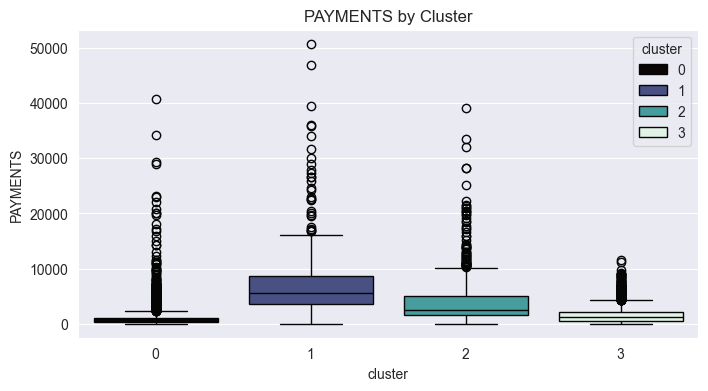

In [117]:
features_to_plot = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='cluster', y=feature, hue='cluster', palette='mako')
    plt.title(f'{feature} by Cluster')
    plt.show()

In [118]:
cluster_profile = df.groupby('cluster')[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']].mean().round(2)
cluster_profile['Count'] = df['cluster'].value_counts().sort_index()

print(cluster_profile)

         BALANCE  PURCHASES  CREDIT_LIMIT  PAYMENTS  Count
cluster                                                   
0        1107.96     330.77       3471.03   1024.86   4992
1        3451.70    8185.78       9597.94   7609.31    339
2        5001.67     733.63       8071.15   4002.70    889
3        1045.60    1428.68       4566.51   1559.55   2730


**Cluster-wise Analysis**

*Cluster 0:*
- Count: Largest group (~5000 samples)
- Balance: Very low
- Purchases: Very low
- Credit Limit: Low
- Payments: Very low

Interpretation:

These are likely low-engagement or inactive customers. They don’t carry much balance, rarely purchase, and pay very little. Possibly new or dormant users, or those using cards minimally.


*Cluster 1:*
- Count: Smallest cluster (~300 samples)
- Balance: Moderately high
- Purchases: Highest among all clusters
- Credit Limit: High
- Payments: Highest

Interpretation:

These are premium/high-value customers. They have a high purchase activity, high payments (likely paying off large balances) and higher credit limits.
The bank should value this group highly due to both spending and repayment behaviors.


*Cluster 2:*
- Count: Mid-size (~850 samples)
- Balance: High
- Purchases: Low
- Credit Limit: Moderate-High
- Payments: Medium-High

Interpretation:

This group may consist of revolvers — users who carry high balances and make consistent payments but don’t spend as much. Possibly, they: Have an existing debt, may use the card for limited or planned spending and are not fully paying off their balances in 1 go, but carrying it forward due to their medium payments rates.


*Cluster 3:*
- Count: Large (~2700 samples)
- Balance: Very low
- Purchases: Low-Moderate
- Credit Limit: Lowest among clusters
- Payments: Low

Interpretation:

This is a group of low-income/light users. They might use credit cards for small routine expenses and have lower creditworthiness (hence, low credit limits).
Represent safe, low-risk but not very profitable customers.